In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn              import svm
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/CarbonDioxide/owid-co2-data.csv')
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [3]:
df = df.dropna()
df = df.loc[:, df.columns.isin(['country' , 'year' , 'co2'])]
Country = 'China'
df = df[df['country'] == Country]
# df = df.drop(['index'], axis=1)
df

,country,year,co2
8959,China,1990,2484.855
8960,China,1991,2606.096
8961,China,1992,2730.788
8962,China,1993,2921.651
8963,China,1994,3100.002
8964,China,1995,3357.909
8965,China,1996,3503.234
8966,China,1997,3510.169
8967,China,1998,3360.455
8968,China,1999,3552.842


In [4]:
X = df['year'].values.reshape(-1, 1)
Y = df['co2']
Y

8959     2484.855
8960     2606.096
8961     2730.788
8962     2921.651
8963     3100.002
8964     3357.909
8965     3503.234
8966     3510.169
8967     3360.455
8968     3552.842
8969     3644.464
8970     3723.731
8971     4112.459
8972     4827.446
8973     5223.755
8974     5876.555
8975     6488.804
8976     6978.612
8977     7496.832
8978     7886.533
8979     8616.652
8980     9528.556
8981     9779.281
8982     9956.309
8983     9998.621
8984     9866.904
8985     9764.979
8986    10011.107
8987    10353.877
Name: co2, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Data_list = [X_train, X_test, y_train, y_test]

In [6]:
Kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
def Model_Selection(Model,Data_list, name):
    Model.fit(Data_list[0],Data_list[2])
    y_Pred = Model.predict(Data_list[1])

    MAE = round(sm.mean_absolute_error(y_test, y_Pred), 2)
    MSE = round(sm.mean_squared_error(y_test, y_Pred), 2)
    MeAE = round(sm.median_absolute_error(y_test, y_Pred), 2)
    Variance = round(sm.explained_variance_score(y_test, y_Pred), 2)
    R2_Score =  round(sm.r2_score(y_test, y_Pred), 2)

    
    frame = pd.DataFrame({'Model': [name], 'MeanAbsoluteError': [MAE], 'MeanSquaredError': [MSE], 'MedianAbsoluteError': [MeAE], 'Variance': [abs(Variance)], 'R2_score':[abs(R2_Score)]})
    return frame

In [7]:
model1 = LinearRegression()
model2 = svm.SVR()
model3 = ElasticNet()
model4 = Lasso(alpha=0.1)
model5 = BayesianRidge()
Model_data = pd.concat([
                       Model_Selection(model1, Data_list, 'LinearRegression'),
                       Model_Selection(model2, Data_list, 'SupportVectorRegression'),
                       Model_Selection(model3, Data_list, 'ElasticNet'),
                       Model_Selection(model4, Data_list, 'Lasso'),
                       Model_Selection(model5, Data_list, 'BaysianRidge')],axis = 0).reset_index()
Model_data

,index,Model,MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,Variance,R2_score
0,0,LinearRegression,769.44,752052.12,863.87,0.92,0.92
1,0,SupportVectorRegression,2999.01,11585877.00,2534.46,0.00,0.25
2,0,ElasticNet,765.28,756279.85,874.31,0.92,0.92
3,0,Lasso,769.44,752054.42,863.88,0.92,0.92
4,0,BaysianRidge,767.77,753635.46,868.07,0.92,0.92


In [8]:
Model = Lasso()
Model.fit(Data_list[0],Data_list[2])
y_Pred = Model.predict([[2024], [2025], [2100]])
y_Pred

array([12606.36471681, 12933.94822124, 37502.7110531 ])

In [9]:
len(df)

29

In [10]:
Year = []
co2 = []
def Predict(year, Model):
    for i in range(1996, year + 1):
        print(i)
        print(Model.predict([[i]]))
        Year.append(i)
        #print(Model.predict([[i]]))
        co2.append(Model.predict([[i]])[0])
        #df.loc[len(df)] = [Country, i, Model.predict([[i]])[0]]
        #row1 = {'country' : Country, 'year' : i, 'co2' : Model.predict([[i]])[0]}
        
        #df = df.append({'country' : Country, 'year' : i, 'co2' : Model.predict([[i]])[0]}, ignore_index = True)

Predict(2018, Model)
print(Year)
print(co2)


1996
[3434.02659292]
1997
[3761.61009735]
1998
[4089.19360177]
1999
[4416.77710619]
2000
[4744.36061062]
2001
[5071.94411504]
2002
[5399.52761947]
2003
[5727.11112389]
2004
[6054.69462832]
2005
[6382.27813274]
2006
[6709.86163717]
2007
[7037.44514159]
2008
[7365.02864602]
2009
[7692.61215044]
2010
[8020.19565487]
2011
[8347.77915929]
2012
[8675.36266372]
2013
[9002.94616814]
2014
[9330.52967257]
2015
[9658.11317699]
2016
[9985.69668142]
2017
[10313.28018584]
2018
[10640.86369027]
[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[3434.0265929203015, 3761.610097345081, 4089.193601769861, 4416.7771061946405, 4744.36061061942, 5071.9441150442, 5399.5276194689795, 5727.111123893759, 6054.694628318539, 6382.278132743319, 6709.861637168098, 7037.445141592878, 7365.028646017658, 7692.612150442437, 8020.195654867217, 8347.779159291997, 8675.362663716776, 9002.946168141556, 9330.529672566336, 9658.113176991

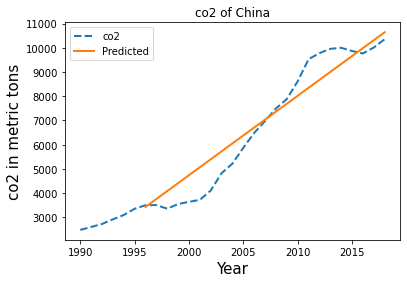

In [11]:
Arr = np.array([list(df['year']), list(df[df.columns[2]])])
Smoothed = savgol_filter(Arr[1], window_length=27, polyorder=3, mode='interp')

Plot = df.plot(x='year', linestyle='dashed', linewidth=2,
                          title='Co2 of  ' + Country, ylabel='co2 in metric tonns')
plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('Year', fontsize=15)
plt.ylabel('co2 in metric tons', fontsize=15)
plt.title('co2 of ' + Country)
plt.plot(Year, co2, label='Predicted', linewidth=2)

#Plot = df.plot(x = 'Year', linestyle='dashed', linewidth=2, title='Temperature of ' + df.columns[1], ylabel='Temperature in degree celsius')
#plt.plot(Arr[0], Smoothed, color='green', label='Smoothed')

legend = plt.legend(loc='upper left')
plt.show()